                                            Part 2: Analyzing the Data                                              

---

    Step-1: Importing Required Module...


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---

    Step-2: loading the .csv File...

Loading the `sales_data.csv` file using `pandas` module and saving it to a variable `df`.

In [2]:
df = pd.read_csv('sales_data.csv')
df.head(10)

,Invoice ID,Date,Customer Name,Customer Email,Product,Category,Quantity,Price Per Unit (BDT),Payment Method,City,Total Price
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2024-09-27,আশীষ চন্দ্র,debaaphiphaa@example.com,Detergent,Household,8,50,Debit Card,Khulna,400
1,37f8a88b-17fc-495a-87a0-ca6e0822e8f3,2024-09-11,অদৃতা সরকার,shaarminkhaanm@example.org,Smartphone,Electronics,22,10860,Credit Card,Rangpur,238920
2,cf36d58b-4737-4190-96da-1dac72ff5d2a,2025-05-16,চঞ্চল মোড়ল,ekraamul23@example.com,Laptop,Electronics,1,65795,Credit Card,Rajshahi,65795
3,18c26797-6142-4a7d-97be-31111a2a73ed,2024-10-30,মুনতাকিম হক,tnmy78@example.org,Jeans,Clothing,17,2130,Credit Card,Rajshahi,36210
4,142c3fe8-60e7-4113-ac1b-8ca1f91e1d4c,2025-01-13,মোস্তাফিজ সিনহা,priymkumaar@example.net,Notebook,Stationery,14,70,Debit Card,Barishal,980
5,fc377a4c-4a15-444d-85e7-ce8a3a578a8e,2024-07-13,কাফি জাহান,daacaaryy@example.net,Pen,Stationery,9,92,Credit Card,Khulna,828
6,5ec42e08-29a3-42e9-9d65-a441d58842de,2024-10-28,মনোজ পাণ্ডে,raayaashaaltaa@example.net,Electric Kettle,Appliances,11,2095,Mobile Payment,Khulna,23045
7,6123fdf7-7656-4f72-a9d4-beef3eabedcb,2024-09-25,হৈমন্তী দাশগুপ্তা,nyn30@example.com,Jeans,Clothing,11,2130,Credit Card,Chittagong,23430
8,3602f8ac-10f1-4c81-848a-aa9e66b2bc5b,2025-06-02,প্রিয়াঙ্কা দে,psaahaa@example.com,Electric Kettle,Appliances,4,2095,Mobile Payment,Mymensing,8380
9,3f22faf8-23be-401d-83cf-2fde24933b83,2025-03-29,হৈমন্তী মৃধা,xsin@example.org,Pen,Stationery,9,92,Credit Card,Barishal,828


---

    Step-3: Analyzing the Data

(a) Total Sales per Unit:

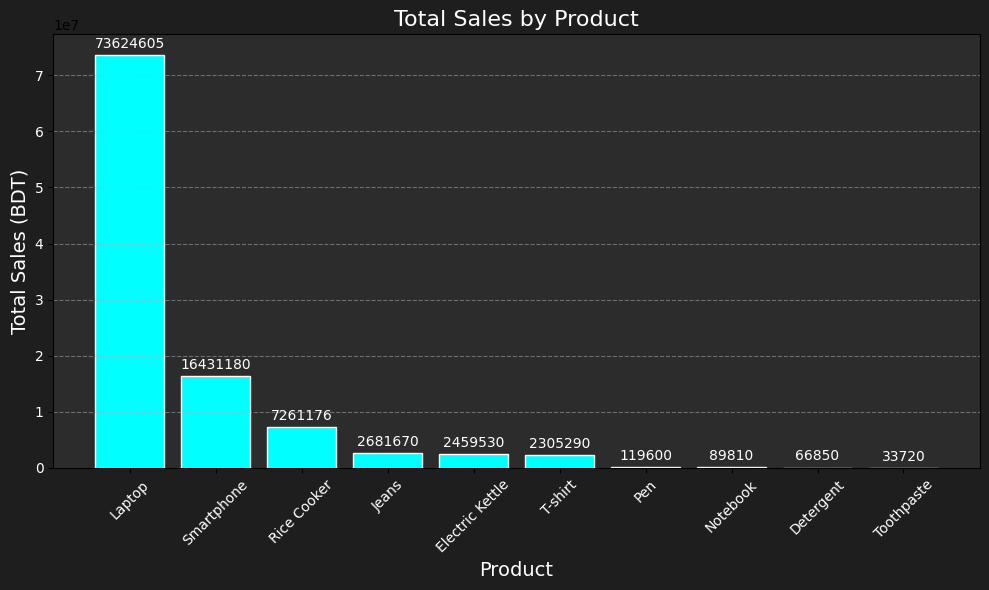

In [11]:
product_vs_total_sales = df.groupby('Product')['Total Price'].sum().sort_values(ascending=False)

# Plotting the total sales for each product
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1e1e1e')
fig.fontcolor = 'white'

# Set the style for the plot
bars = ax.bar(product_vs_total_sales.index, product_vs_total_sales.values, color='cyan', edgecolor='white')
ax.bar_label(bars, fmt='%d', padding=3, fontsize=10, color='white')
ax.set_facecolor('#2c2c2c')

# Customizing the plot
plt.title('Total Sales by Product', fontsize = 16, color = 'white')
plt.xlabel('Product', fontsize = 14, color = 'white')
plt.ylabel('Total Sales (BDT)', fontsize = 14, color = 'white')
plt.xticks(rotation = 45, color = 'white')
plt.yticks(color = 'white')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

(b) Average Quantities Sold per City:

City
Khulna        161337.47
Rajshahi      123090.68
Barishal      109632.34
Rangpur       105822.19
Mymensing      98650.09
Chittagong     91694.05
Dhaka          76723.02
Sylhet         75955.21
Name: Total Price, dtype: float64


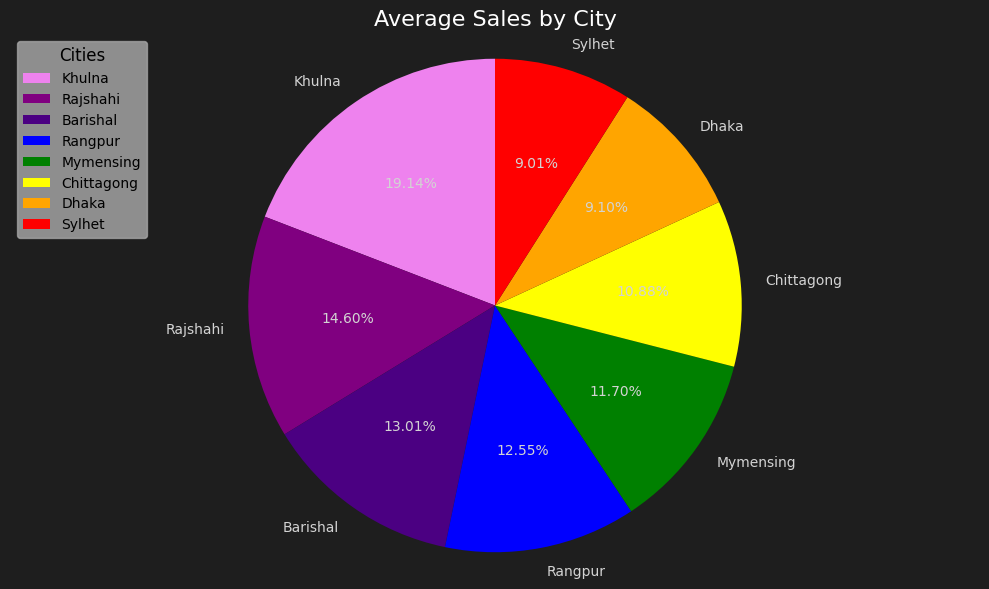

In [17]:
city_vs_avg_sales = df.groupby('City')['Total Price'].mean().round(2).sort_values(ascending=False)
print(city_vs_avg_sales)

# Plotting the average sales for each city
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1e1e1e')
fig.fontcolor = 'white'

# Set the style for the plot
pie = ax.pie(city_vs_avg_sales, labels = city_vs_avg_sales.index, 
             autopct = '%.2f%%', colors = ['violet', 'purple', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'], 
             startangle = 90, textprops={'color': 'lightgrey'})
ax.set_title('Average Sales by City', fontsize = 16, color = 'white')

# Customizing the plot
plt.axis('equal')
plt.legend(title='Cities', loc='upper left', fontsize=10, title_fontsize='12', facecolor='white', framealpha=0.5)
plt.tight_layout()
plt.show()

(c) Categorizing with Pricing Weight:

In [19]:
df['Order Type'] = df['Total Price'].apply(lambda x: 'High' if x > 100000 else 'Medium' if x > 50000
                                           else 'Low' if x > 10000 else 'Very Low')
df['Order Type'].value_counts().sort_values(ascending = True)

Order Type
Medium       75
High        199
Low         286
Very Low    440
Name: count, dtype: int64

(d) Extracting Top 20 Buyers Info:

In [30]:
info = df.sort_values(by='Total Price', ascending=False)
df.reset_index(drop=True, inplace=True) # Resetting index after sorting
info.head(20) # Displaying top 20 orders by total price

,Invoice ID,Date,Customer Name,Customer Email,Product,Category,Quantity,Price Per Unit (BDT),Payment Method,City,Total Price,Order Type
681,699fdb02-bcdd-4b48-bcb3-c9fa191abb3d,2025-05-16,জয়দীপ দাশগুপ্তা,kaaderaaphiyaa@example.com,Laptop,Electronics,24,65795,Debit Card,Barishal,1579080,High
891,5b9e75f4-12e0-4b9c-8288-49d95ce195be,2024-06-24,অদিতি প্রামানিক,priyti39@example.com,Laptop,Electronics,23,65795,Cash on Delivery,Chittagong,1513285,High
977,aa546c79-bf3f-41d5-a557-c82c488c6ea4,2025-05-08,অহনা হক,muntaasir81@example.com,Laptop,Electronics,22,65795,Credit Card,Chittagong,1447490,High
567,953fcfd4-6069-4b6d-84b5-1c12ab132032,2025-05-30,মাধু কান্ত,jynt04@example.org,Laptop,Electronics,22,65795,Cash on Delivery,Dhaka,1447490,High
519,71e15b9f-8c6d-468e-85bc-f3baef52d36e,2024-08-04,সাব্বির প্রামানিক,hbegm@example.net,Laptop,Electronics,22,65795,Debit Card,Rajshahi,1447490,High
931,833334f6-6a6a-4149-8b44-676d2ac39be9,2024-07-24,বাসির আলম,phaujiyaakhaan@example.net,Laptop,Electronics,21,65795,Cash on Delivery,Sylhet,1381695,High
954,84bed7ed-1491-451d-a6a7-a6b0f9619ae2,2025-06-01,জগদীশ দত্ত,sbishbaas@example.com,Laptop,Electronics,21,65795,Debit Card,Rajshahi,1381695,High
630,d21ce315-8f5e-448e-b40f-040e0037447f,2024-10-30,আয়ুষ চৌধুরী,nishitaashuklaa@example.net,Laptop,Electronics,21,65795,Mobile Payment,Barishal,1381695,High
388,5fcd859e-d6e1-4109-97e1-74e6f76b9723,2025-01-17,আয়ুশি ব্যানার্জি,minyaapritm@example.com,Laptop,Electronics,21,65795,Cash on Delivery,Mymensing,1381695,High
221,1cd66b09-cf0e-4d2b-b15c-167a45d8a6ad,2024-10-19,রাজ পোদ্দার,aadipaal@example.com,Laptop,Electronics,21,65795,Debit Card,Khulna,1381695,High


(d) Listing Products According to Their Quantities:

In [31]:
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
Smartphone         1513
Detergent          1337
Pen                1300
T-shirt            1285
Notebook           1283
Jeans              1259
Rice Cooker        1258
Electric Kettle    1174
Toothpaste         1124
Laptop             1119
Name: Quantity, dtype: int64

---

We can also do many more operations using the `pandas` and `matplotlib` modules and play with the dataset.